# Land Mask

In [138]:
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import xarray as xr
import cmocean
from salishsea_tools import viz_tools
from salishsea_tools import geo_tools
from salishsea_tools import grid_tools
from salishsea_tools import utilities
%matplotlib inline
speed_cmap = cmocean.cm.speed

In [18]:
GEM = xr.open_dataset("https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSaAtmosphereGridV1")  # HDPRC latlon
nemo_mask =xr.open_dataset("https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSn2DMeshMaskV17-02") # NEMO land mask
nemo_grid = xr.open_dataset("https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSnBathymetryV17-02") # NEMO lat lon

In [135]:
winddata = xr.open_dataset("https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSaSurfaceAtmosphereFieldsV1") # Contains wind data

In [42]:
def build_GEM_mask(grid_GEM, grid_NEMO, mask_NEMO):


    # Preallocate
    ngrid_GEM = grid_GEM['gridX'].shape[0] * grid_GEM['gridY'].shape[0]
    mask_GEM = np.zeros(ngrid_GEM, dtype=int)

    # Evaluate each point on GEM grid
    bar = utilities.statusbar('Building GEM mask', width=90, maxval=ngrid_GEM)
    for index, coords in enumerate(bar(zip(
            grid_GEM['longitude'].values.reshape(ngrid_GEM) - 360,
            grid_GEM['latitude'].values.reshape(ngrid_GEM),
    ))):

        j, i = geo_tools.find_closest_model_point(
            coords[0], coords[1],
            grid_NEMO['longitude'], grid_NEMO['latitude'],
        )
        if j is np.nan or i is np.nan:
            mask_GEM[index] = 0
        else:
            mask_GEM[index] = mask_NEMO[j, i].values

    # Reshape
    mask_GEM = mask_GEM.reshape(grid_GEM['longitude'].shape)

    return mask_GEM

In [94]:
land_mask = build_GEM_mask(GEM, nemo_grid, nemo_mask.tmaskutil.isel(time=0))

Building GEM mask 100% (68096 of 68096) |##################################|Time:  0:04:15


In [216]:
def mask_data(data, land_mask = land_mask):
    masked_data = ma.masked_array(data, np.logical_not(land_mask))
    remove_zero_rows = masked_data[~(masked_data==np.nan).all(1)]
    transpose_rows = np.transpose(remove_zeros)
    remove_zero_cols = np.transpose(transpose[~(transpose==np.nan).all(1)])
    return remove_zero_cols

In [218]:
time_0_wind = mask_data(winddata.u_wind.isel(time=0).values)

/home/abhudia/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:1334: MatplotlibDeprecationWarning: 
box-forced
  "2.2", "box-forced", obj_type="keyword argument")


1.1363636363636362

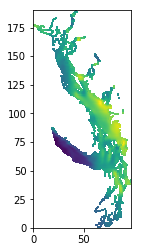

In [220]:
# plot with forced aspect ratio
fig, ax = plt.subplots(1,1)
ax.pcolormesh(time_0_wind)
viz_tools.set_aspect(ax)

In [221]:
winddata

<xarray.Dataset>
Dimensions:    (gridX: 256, gridY: 266, time: 37896)
Coordinates:
  * time       (time) datetime64[ns] 2014-09-12 ... 2019-01-07T23:00:00
  * gridY      (gridY) float64 0.0 2.5e+03 5e+03 ... 6.575e+05 6.6e+05 6.625e+05
  * gridX      (gridX) float64 0.0 2.5e+03 5e+03 ... 6.35e+05 6.375e+05
Data variables:
    atmpres    (time, gridY, gridX) float32 ...
    precip     (time, gridY, gridX) float32 ...
    qair       (time, gridY, gridX) float32 ...
    solar      (time, gridY, gridX) float32 ...
    tair       (time, gridY, gridX) float32 ...
    therm_rad  (time, gridY, gridX) float32 ...
    u_wind     (time, gridY, gridX) float32 ...
    v_wind     (time, gridY, gridX) float32 ...
Attributes:
    acknowledgement:           MEOPAR, ONC, Compute Canada, Environment Canada
    cdm_data_type:             Grid
    Conventions:               CF-1.6, COARDS, ACDD-1.3
    coverage_content_type:     modelResult
    creator_email:             sallen@eos.ubc.ca
    creator_name:

# December winds

In [ ]:
dec_data_u = winddata.u_wind.loc[winddata['time.month'].isin([12])]
dec_data_v = winddata.v_wind.loc[winddata['time.month'].isin([12])]
dec_wind_mag = xr.ufuncs.sqrt(dec_data_u**2+dec_data_v**2)

## Mean winds

In [ ]:
mean_dec = mask_data(dec_wind_mag.mean(dim='time').values)
fig, ax = plt.subplots(1,1)
cf = ax.pcolormesh(mean_dec, cmap = speed_cmap)
viz_tools.set_aspect(ax)
fig.colorbar(cf, ax=ax)
plt.title('Mean December wind speeds 2014-2018 (m/s)')
plt.xlabel('X')
plt.ylabel('Y')

## Standard Deviation

In [ ]:
stddev_dec = mask_data(dec_wind_mag.std(dim='time').values)
plt.pcolormesh(stddev_dec, cmap = speed_cmap)
plt.colorbar()
plt.title('Standard Deviation of December wind speeds 2014-2018 (m/s)')
plt.xlabel('X')
plt.ylabel('Y')

## Maximum winds

In [ ]:
max_dec = mask_data(dec_wind_mag.max(dim='time').values)
plt.pcolormesh(max_dec, cmap = speed_cmap)
plt.colorbar()
plt.title('Maxima of December wind speeds 2014-2018 (m/s)')
plt.xlabel('X')
plt.ylabel('Y')

# March winds

In [ ]:
mar_data_u = winddata.u_wind.loc[winddata['time.month'].isin([3])]
mar_data_v = winddata.v_wind.loc[winddata['time.month'].isin([3])]
mar_wind_mag = xr.ufuncs.sqrt(mar_data_u**2+mar_data_v**2)

## Mean Winds

In [ ]:
mean_mar = mask_data(mar_wind_mag.mean(dim='time').values)
plt.pcolormesh(mean_mar, cmap = speed_cmap)
plt.colorbar()
plt.title('Mean March wind speeds 2014-2018 (m/s)')
plt.xlabel('X')
plt.ylabel('Y')

## Standard Deviation

In [ ]:
stddev_mar = mask_data(mar_wind_mag.std(dim='time').values)
plt.pcolormesh(stddev_mar, cmap = speed_cmap)
plt.colorbar()
plt.title('Standard Deviation of March wind speeds 2014-2018 (m/s)')
plt.xlabel('X')
plt.ylabel('Y')

## Maximum Winds

In [ ]:
max_mar = mask_data(mar_wind_mag.max(dim='time').values)
plt.pcolormesh(max_mar, cmap = speed_cmap)
plt.colorbar()
plt.title('Maxima of March wind speeds 2014-2018 (m/s)')
plt.xlabel('X')
plt.ylabel('Y')

# June Winds

In [ ]:
june_data_u = winddata.u_wind.loc[winddata['time.month'].isin([6])]
june_data_v = winddata.v_wind.loc[winddata['time.month'].isin([6])]
june_wind_mag = xr.ufuncs.sqrt(june_data_u**2+june_data_v**2)

In [ ]:
mean_june = mask_data(june_wind_mag.mean(dim='time').values)
plt.pcolormesh(mean_june, cmap = speed_cmap)
plt.colorbar()
plt.title('Mean June wind speeds 2014-2018 (m/s)')
plt.xlabel('X')
plt.ylabel('Y')

In [ ]:
stddev_june = mask_data(june_wind_mag.std(dim='time').values)
plt.pcolormesh(stddev_june, cmap = speed_cmap)
plt.colorbar()
plt.title('Standard Deviation of June wind speeds 2014-2018 (m/s)')
plt.xlabel('X')
plt.ylabel('Y')

In [ ]:
max_june = mask_data(june_wind_mag.max(dim='time').values)
plt.pcolormesh(max_june, cmap = speed_cmap)
plt.colorbar()
plt.title('Maxima of June wind speeds 2014-2018 (m/s)')
plt.xlabel('X')
plt.ylabel('Y')

# September winds

In [ ]:
sept_data_u = winddata.u_wind.loc[winddata['time.month'].isin([9])]
sept_data_v = winddata.v_wind.loc[winddata['time.month'].isin([9])]
sept_wind_mag = xr.ufuncs.sqrt(sept_data_u**2+sept_data_v**2)

In [ ]:
mean_sept= mask_data(sept_wind_mag.mean(dim='time').values)
plt.pcolormesh(mean_sept, cmap = speed_cmap)
plt.colorbar()
plt.title('Mean September wind speeds 2014-2018 (m/s)')
plt.xlabel('X')
plt.ylabel('Y')

In [ ]:
stddev_sept= mask_data(sept_wind_mag.std(dim='time').values)
plt.pcolormesh(stddev_sept, cmap = speed_cmap)
plt.colorbar()
plt.title('Standard Deviation of September wind speeds 2014-2018 (m/s)')
plt.xlabel('X')
plt.ylabel('Y')

In [ ]:
max_sept= mask_data(sept_wind_mag.max(dim='time').values)
plt.pcolormesh(max_sept, cmap = speed_cmap)
plt.colorbar()
plt.title('Maxima of September wind speeds 2014-2018 (m/s)')
plt.xlabel('X')
plt.ylabel('Y')

# All Winds